# Stock performance analysis

### Important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

### Time range for the data

In [2]:
start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()

### The list for tickers

In [3]:
tickers = ['AAPL','MSFT','NFLX','GOOG']

### Downloading data for each tickers and store it in a distionary

In [4]:
data_dict = {}
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data_dict[ticker] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Combine the data for all tickers into a single DataFrame

In [5]:
df = pd.concat(data_dict , keys=tickers , names=['Ticker','Date'])

In [6]:
df = df.reset_index()

In [7]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-05-22,173.979996,174.710007,173.449997,174.199997,173.965073,43570900
1,AAPL,2023-05-23,173.130005,173.380005,171.279999,171.559998,171.328644,50747300
2,AAPL,2023-05-24,171.089996,172.419998,170.520004,171.839996,171.608261,45143500
3,AAPL,2023-05-25,172.410004,173.899994,171.690002,172.990005,172.756714,56058300
4,AAPL,2023-05-26,173.320007,175.770004,173.110001,175.429993,175.193420,54835000


### Visualize stock market performance using line plot

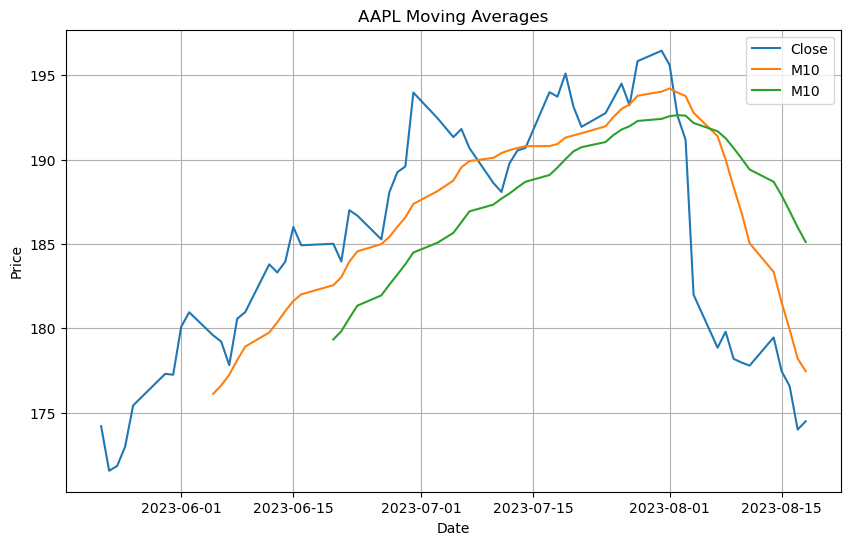

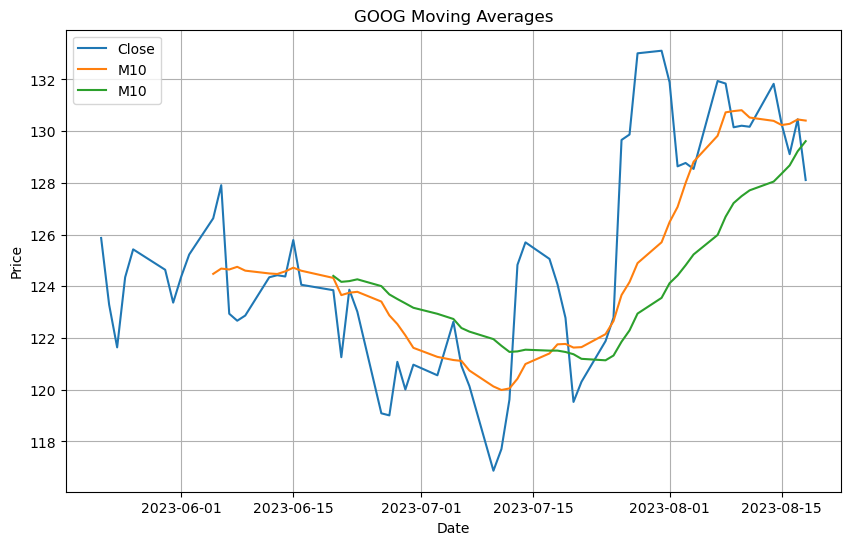

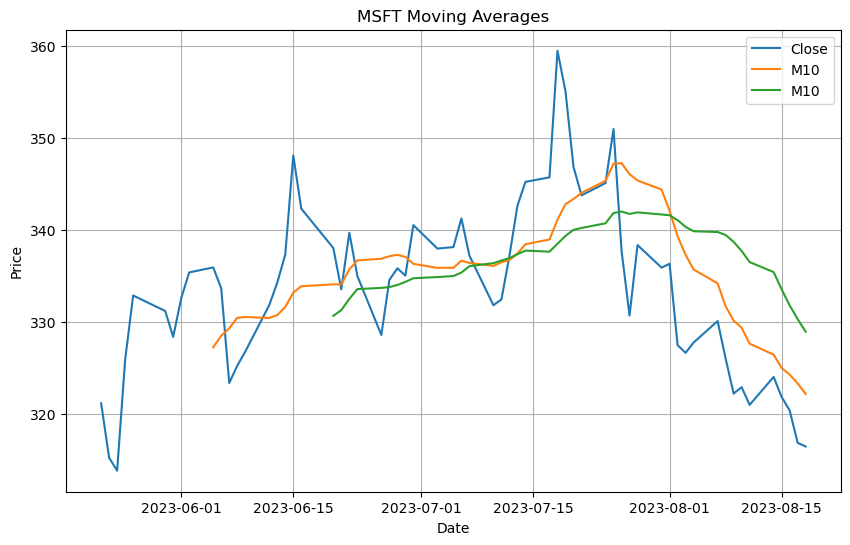

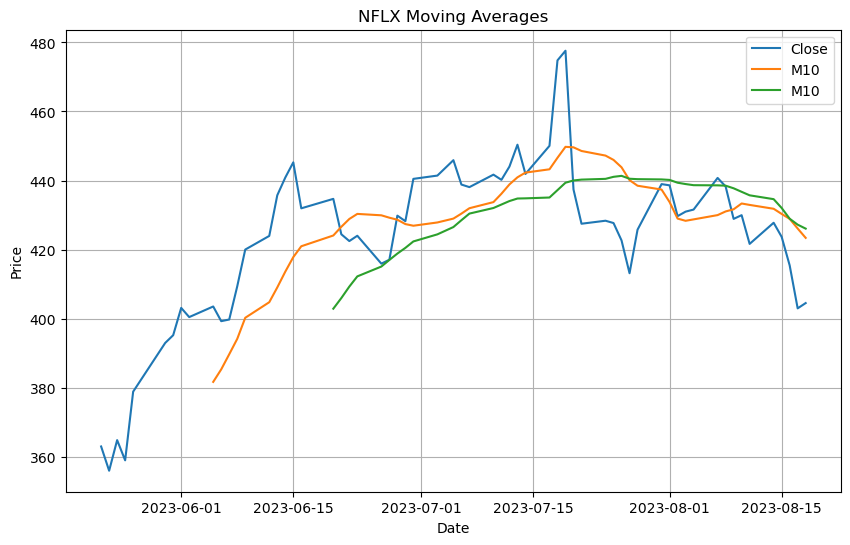

In [11]:
for ticker , group in df.groupby('Ticker'):
    plt.figure(figsize=(10,6))
    plt.plot(group['Date'],group['Close'],label='Close')
    plt.plot(group['Date'],group['Close'].rolling(window=10).mean(),label='M10')
    plt.plot(group['Date'],group['Close'].rolling(window=20).mean(),label='M10')
    plt.title(f'{ticker} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

### Calculate volatility

In [12]:
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)


### Visualize volatility using line plot

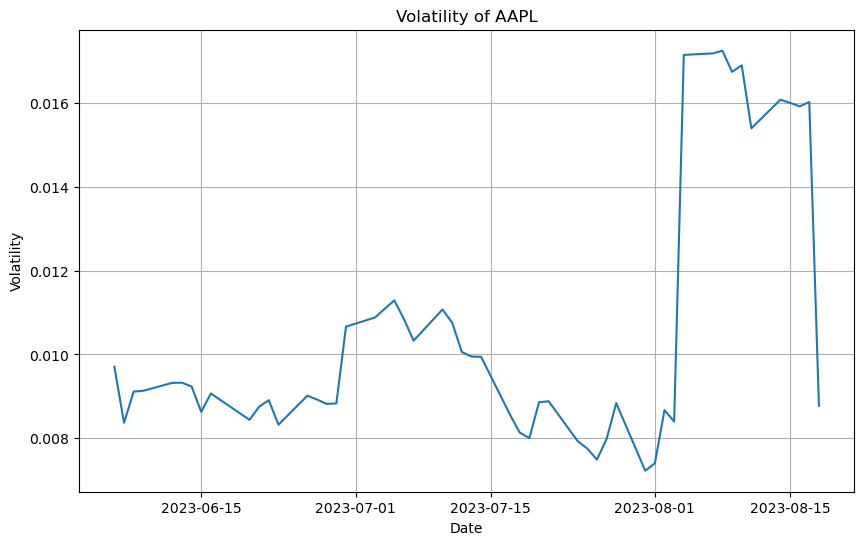

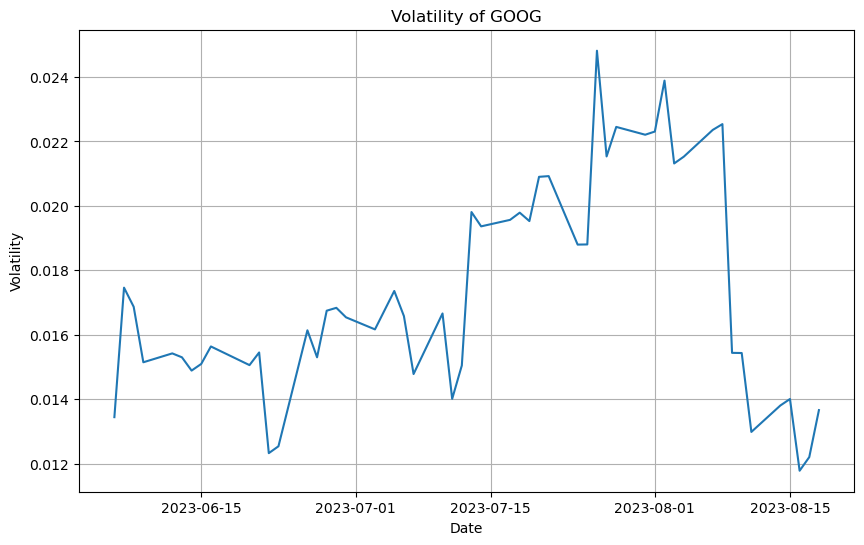

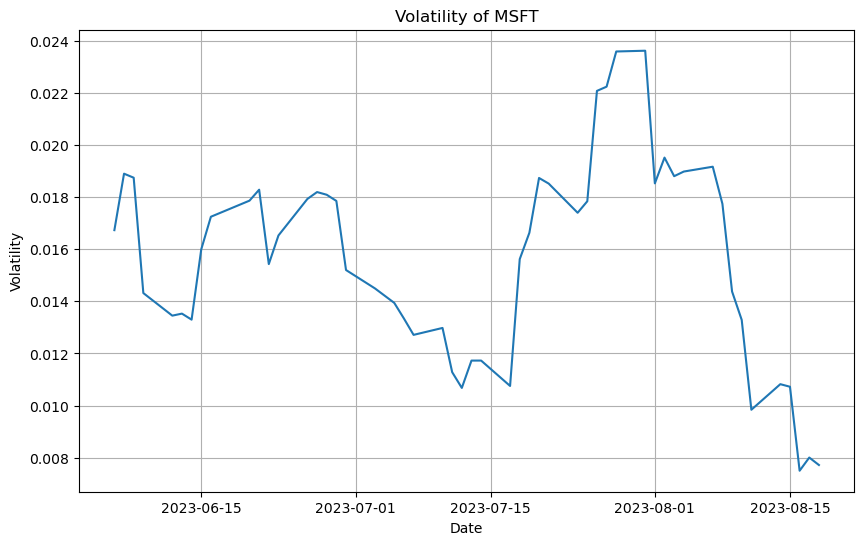

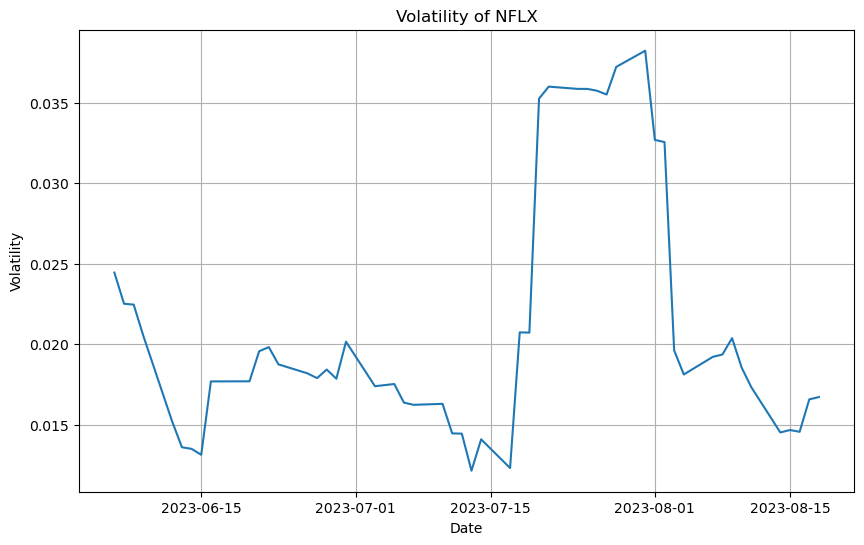

In [13]:
for ticker, group in df.groupby('Ticker'):
    plt.figure(figsize=(10, 6))
    plt.plot(group['Date'], group['Volatility'])
    plt.title(f"Volatility of {ticker}")
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.grid()
    plt.show()

### Create a DataFrame for correlation analysis

In [15]:
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
df_corr = pd.merge(apple, microsoft, on='Date')

### Visualize correlation using scatter plot

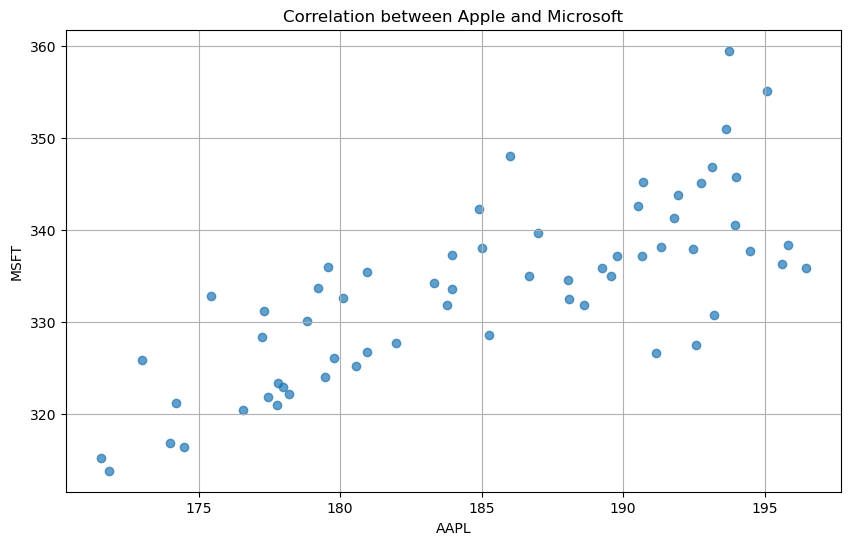

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df_corr['AAPL'], df_corr['MSFT'], alpha=0.7)
plt.title('Correlation between Apple and Microsoft')
plt.xlabel('AAPL')
plt.ylabel('MSFT')
plt.grid()
plt.show()

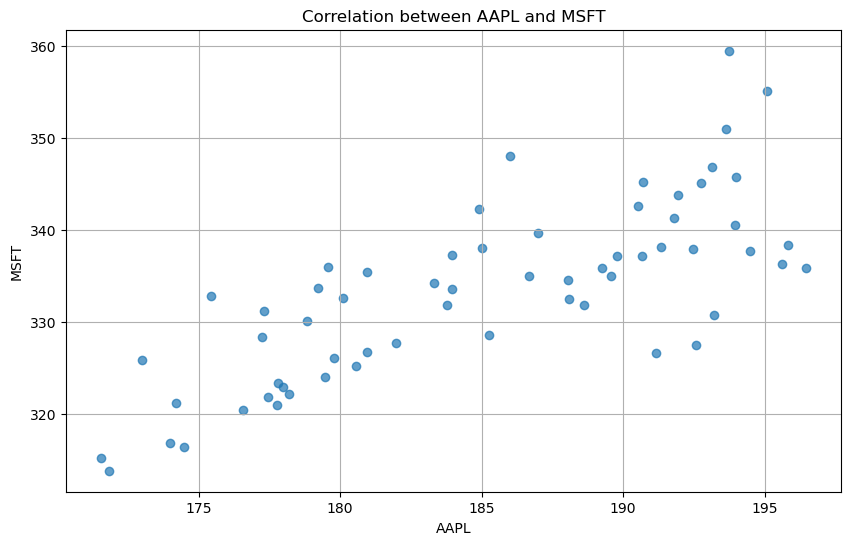

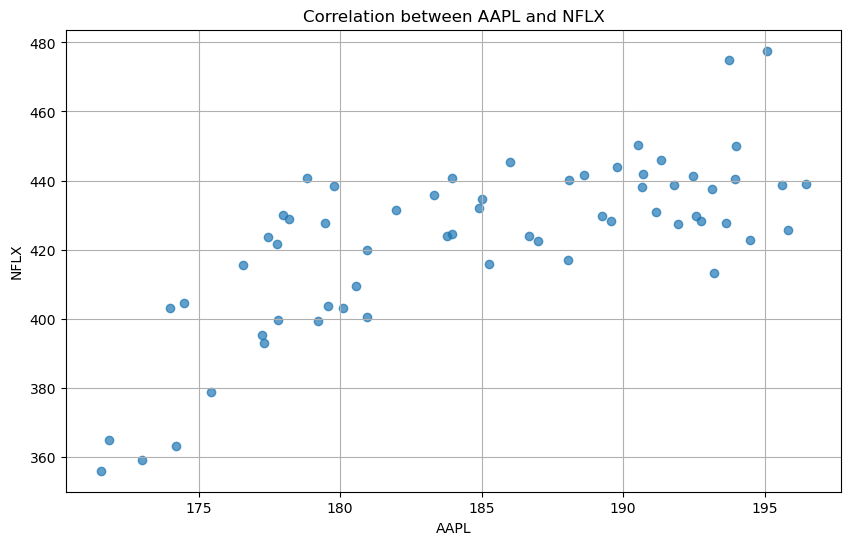

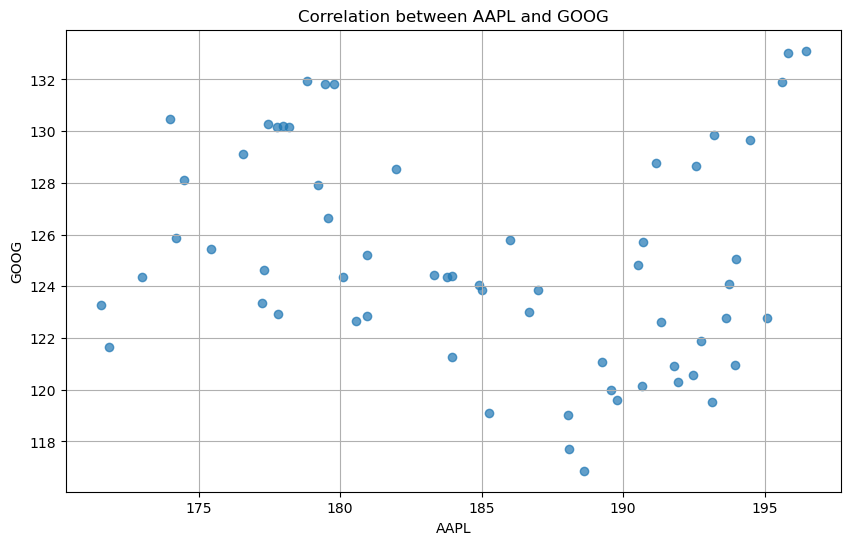

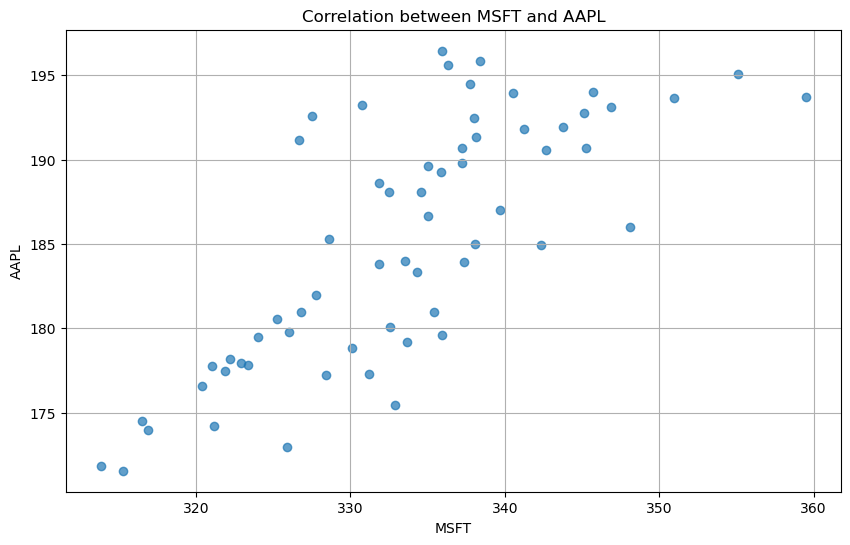

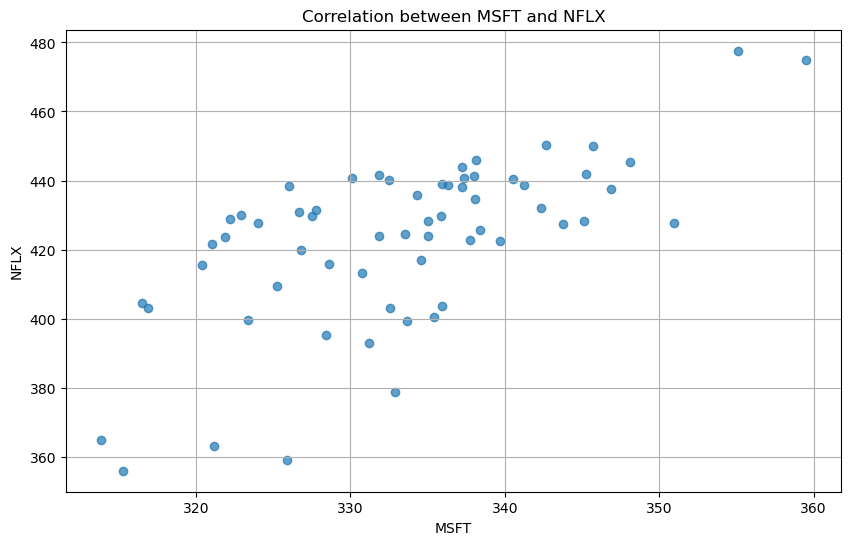

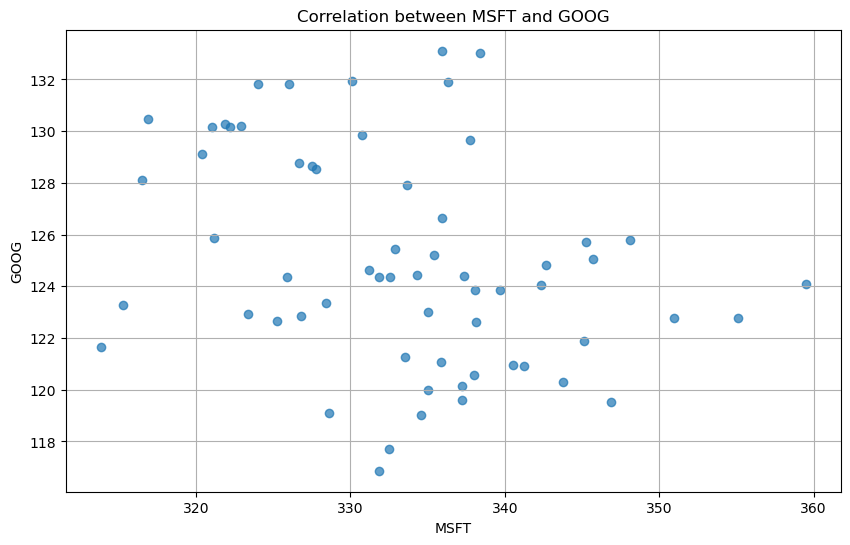

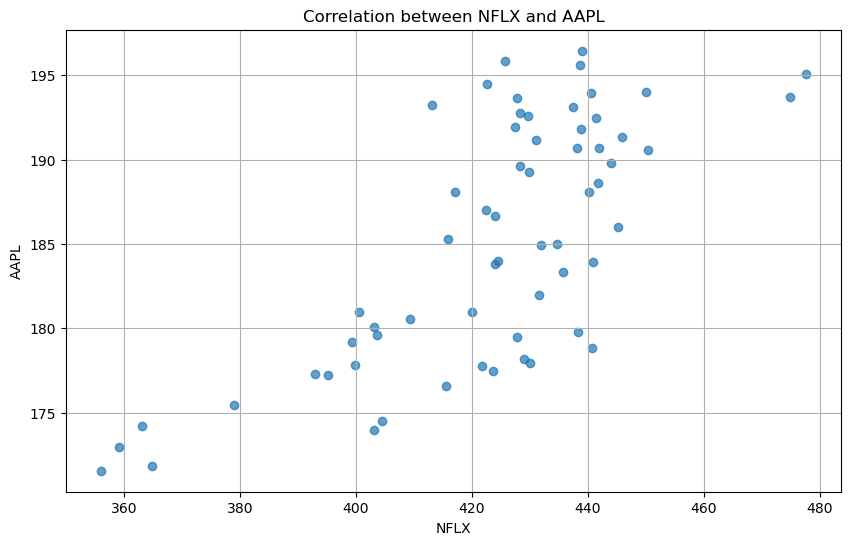

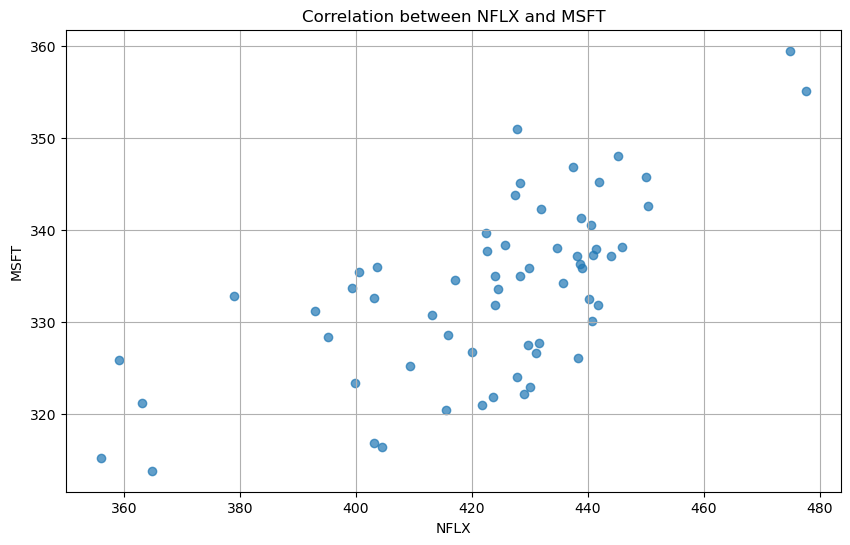

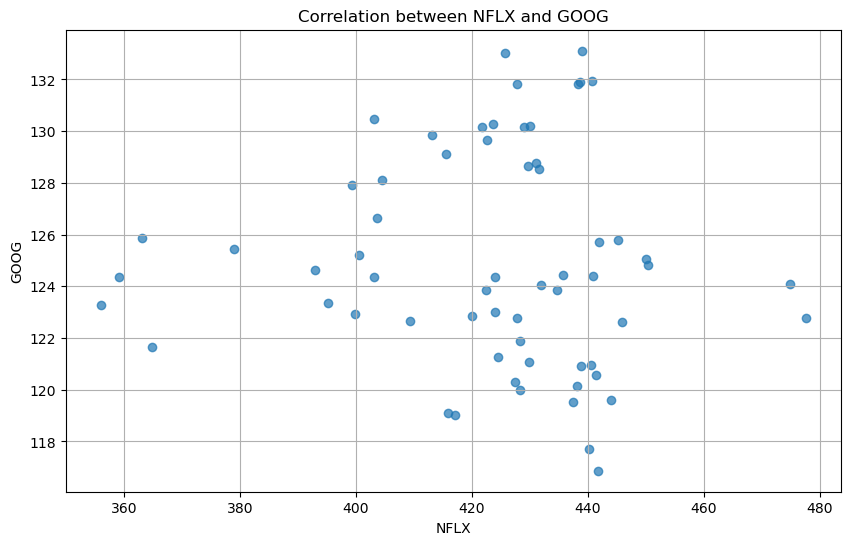

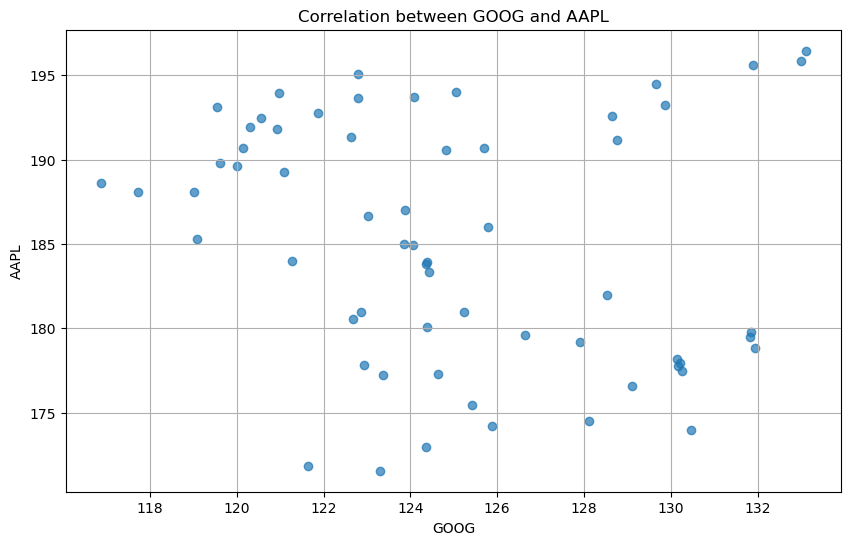

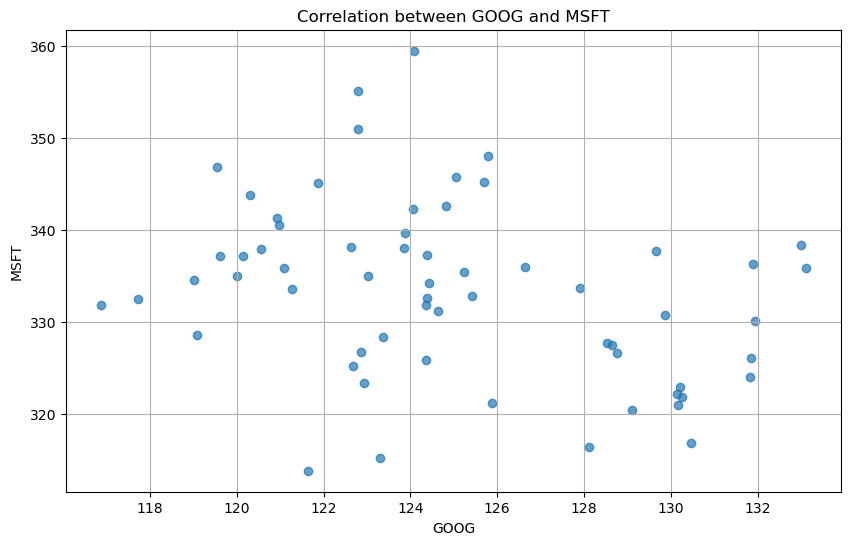

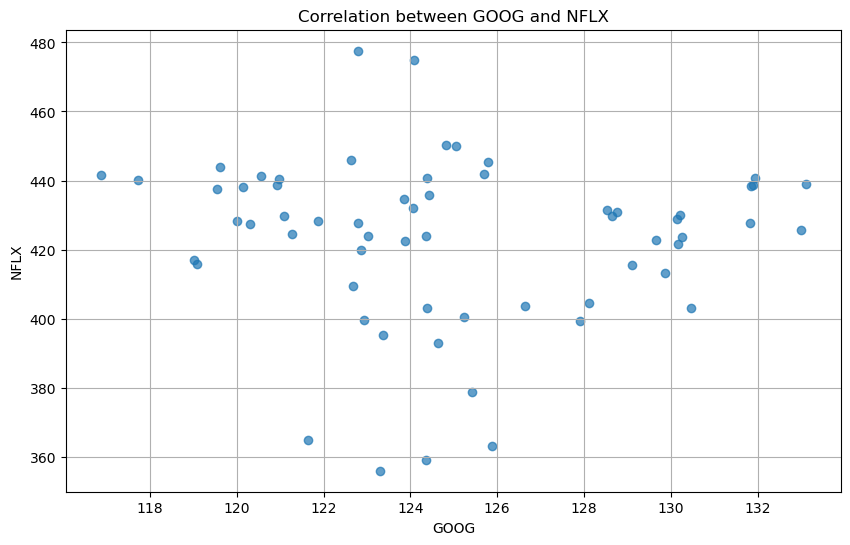

In [18]:
# Create a DataFrame for correlation analysis
corr_data = {}
for ticker1 in tickers:
    for ticker2 in tickers:
        if ticker1 != ticker2:
            data1 = df.loc[df['Ticker'] == ticker1, ['Date', 'Close']].rename(columns={'Close': ticker1})
            data2 = df.loc[df['Ticker'] == ticker2, ['Date', 'Close']].rename(columns={'Close': ticker2})
            corr_data[f'{ticker1}_{ticker2}'] = pd.merge(data1, data2, on='Date')

# Visualize correlation using scatter plots
for key, data in corr_data.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(data[data.columns[1]], data[data.columns[2]], alpha=0.7)
    tickers = key.split('_')
    plt.title(f'Correlation between {tickers[0]} and {tickers[1]}')
    plt.xlabel(tickers[0])
    plt.ylabel(tickers[1])
    plt.grid()
    plt.show()
